In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc
)


In [7]:
data = pd.read_csv("C:\JN ni marlowe\Final Project Electives 2 Pasicaran\Data\plant_disease_dataset.csv")
data.head()

<>:1: SyntaxWarning: "\J" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\J"? A raw string is also an option.
<>:1: SyntaxWarning: "\J" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\J"? A raw string is also an option.
C:\Users\lykap\AppData\Local\Temp\ipykernel_6044\2844248779.py:1: SyntaxWarning: "\J" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\J"? A raw string is also an option.
  data = pd.read_csv("C:\JN ni marlowe\Final Project Electives 2 Pasicaran\Data\plant_disease_dataset.csv")


,temperature,humidity,rainfall,soil_pH,"TARGET_COL = ""disease"
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


In [8]:
print("Dataset Shape:", data.shape)
print("\nMissing Values:\n", data.isnull().sum())
data.describe()


Dataset Shape: (10000, 5)

Missing Values:
 temperature              0
humidity                 0
rainfall                 0
soil_pH                  0
TARGET_COL = "disease    0
dtype: int64


,temperature,humidity,rainfall,soil_pH,"TARGET_COL = ""disease"
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25.612191,62.119300,9.807522,6.245855,0.241000
std,5.813841,22.679977,9.852130,1.302465,0.427712
min,5.387999,6.244209,0.000055,4.000075,0.000000
25%,21.815610,40.772925,2.812822,5.122970,0.000000
50%,25.293238,72.211752,6.864898,6.232188,0.000000
75%,28.916048,81.032999,13.442871,7.386377,0.000000
max,56.686495,102.395421,84.654161,8.499875,1.000000


In [9]:
# Features
X = data[['temperature', 'humidity', 'rainfall', 'soil_pH']]

# Target
y = data['TARGET_COL = "disease']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=123
)

X_train.shape, X_test.shape


((8000, 4), (2000, 4))

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [13]:
y_pred = model.predict(X_test_scaled)

# Probability scores
y_prob = model.predict_proba(X_test_scaled)[:, 1]


In [14]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.7695

In [15]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[1486,   38],
       [ 423,   53]])

In [16]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1524
           1       0.58      0.11      0.19       476

    accuracy                           0.77      2000
   macro avg       0.68      0.54      0.53      2000
weighted avg       0.73      0.77      0.70      2000



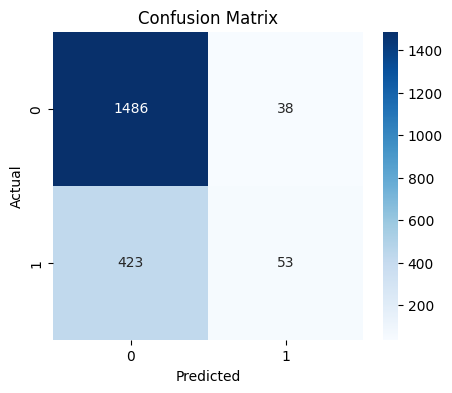

In [17]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


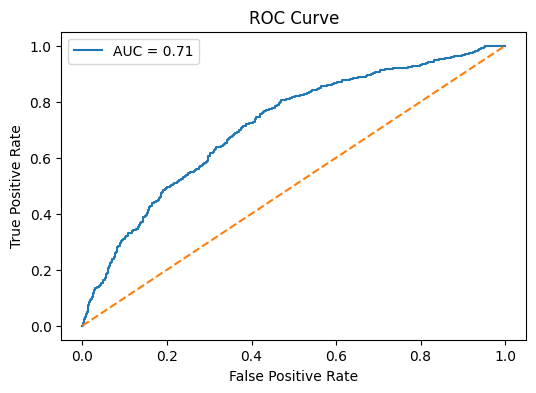

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [19]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

feature_importance.sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
1,humidity,0.505070
2,rainfall,0.482214
0,temperature,0.018877
3,soil_pH,-0.192634
